Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
%cd TDDI2022/
# Klasörün içeriğinin görülmesi için
%ls

Veri İskeleti TDDI2022 klasöründe bulunan yarışma kapsamında yarışmacılara sağlanan **kanunum-nlp-doc-analysis-dataset.csv** dosyasının içindeki verileri pandas ile okuyarak oluşturulacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('kanunum-nlp-doc-analysis-dataset.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4142 non-null   int64  
 1   kategori        4142 non-null   object 
 2   baslik          4142 non-null   object 
 3   rega_no         2527 non-null   object 
 4   mukerrer_no     3642 non-null   float64
 5   rega_tarihi     2527 non-null   object 
 6   kurum           2488 non-null   object 
 7   mevzuat_no      1091 non-null   object 
 8   belge_sayi      43 non-null     object 
 9   mevzuat_tarihi  1905 non-null   object 
 10  donem           500 non-null    object 
 11  sira_no         500 non-null    object 
 12  madde_sayisi    4142 non-null   int64  
 13  data_text       4142 non-null   object 
 14  url             4142 non-null   object 
 15  kanunum_url     4142 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 517.9+ KB


Veri İskeletinde **kategori** sütununun / alanının kaç gruptan ve bu grupların kaç satırdan / kayıttan oluştuğunu **en az sayıdaki belgeden en çok sayıdaki belgeye doğru** ekrana yazdırılacaktır.

In [5]:
print(df.groupby('kategori').size().sort_values())

kategori
Cumhurbaşkanlığı Kararnamesi     54
Tüzük                            82
Kanun Hükmünde Kararname         91
Genelge                         385
Komisyon Raporu                 500
Kanun                           514
Resmi Gazete                    546
Yönetmelik                      597
Tebliğ                          623
Özelge                          750
dtype: int64


Veriler üzerinde yaptığımız ön çalışmada (ekrana data_text sütunundan / alanından bir kaç satır yazdırılmış ve içerikleri incelenmiştir) veri kümesinin data_text sütunundaki / alanındaki içerik iki parçaya ayrılabileceği görülmüştür. Böylelikle data_text sütunu / alanı işlenirken belgeye ait bilgiler birinci parçada belgenin içeriği ikinci parçada görülebilir. Tüm data_text kayıtlarında yer alan ortak bir noktanın varlığını kontrol etmek için aşağıdaki kod yardımı ile resmi belgelerin hepsinde 'Madde 1 -' verisi var mı?

In [6]:
kayitSayisi, alanSayisi = df.shape
say = 0
satirToplami, sutunToplami = df.shape
for satir in range(satirToplami):
  if df['data_text'][satir].find('Madde 1 -'):
    say+=1
if say==kayitSayisi:
  print(say,'=',kayitSayisi,'yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "Madde 1 -" verisini içeren kayıt sayısı birbirine eşittir.')
else:
  print('Tüm kayıtlarda aranan veri bulunamamıştır.')

4142 = 4142 yani data_text alanındaki toplam kayıt sayısı ve her bir kayıtta "Madde 1 -" verisini içeren kayıt sayısı birbirine eşittir.


Yukarıdaki bulgular doğrultusunda örnek bir kaydı ikiye bölerek **belge ile ilgili verileri toplayabileceğimiz baş kısmı** görelim. Yine bu baş kısmın **belge türü** ile ilgili bilgi içerip içermediğini görmek için kategori alanındaki veriyi de ekrana yazdıralım. Ayrıca dokümanı küçük hafre çevirelim ve lower() komutunun nasıl bir çeviri yaptığını izleyelim.

In [33]:
satir = 1749
print('Kategori:',df['kategori'][satir],'\n',35*'-','\nİçerik:',df['data_text'][satir][:df['data_text'][satir].find('Madde 1')].lower(),sep='')

Kategori:Komisyon Raporu
-----------------------------------
İçerik:dönem : 23 yasama yýlý : 2

türkýye büyük mýllet meclýsý
plan ve bütçe komýsyonu raporu

s. sayýsý : 57

2008 yýlý merkezi yönetim bütçe kanunu tasarýsý
ve

baðlý cetveller
(a, b, c, e, f, h, ý, k, m, o, p, t ve v cetvelleri)

26 kasım 200


Komsiyon Raporu olarak kategori edilen toplam 500 adet kayıt vardı. Bu kayıtlar üzerinde belge türü tespit etmek için bir fonksiyon oluşturup veriyi burada analiz etmek ve analizimizin sonucunu mevcut 500 kayıttan kaçında doğru sonuç veridğini kontrol etmek yöntemimizin doğruluğu hakkında bize bilgi verecektir.

In [35]:
# Komisyon Raporu olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulKOMISYONRAPORU(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir Komisyon Raporudur diye kontrol ediyoruz!
  if verilenMetin.lower().find('kanuntasarisi')!=-1 or verilenMetin.lower().find('yasamayili')!=-1 or verilenMetin.lower().find('tbmm')!=-1 or verilenMetin.lower().find('komisyonraporu')!=-1 or verilenMetin.lower().find('ssayısı')!=-1 or verilenMetin.lower().find('ssayisi')!=-1 or verilenMetin.lower().find('sirano')!=-1 or verilenMetin.lower().find('sırano')!=-1 or verilenMetin.lower().find('ilâve')!=-1:
    return 'Komisyon Raporu'
  # Başlık içinde arama yapan alternatif yöntemler de denenebilir!!!

# 500 kayıt arasında kaç tanesinin Komisyon Raporu olarak işaretlenmediğini sayacak hataSayisi değişkenine ilk değer olarak 0 SIFIR veriyoruz.
hataSayisi=0

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

# Sadece Komisyon Raporu kategorisinde kontrolümüzü yapıyoruz
for satir in range(satirToplami):
  if df['kategori'][satir]!='Komisyon Raporu':
    continue
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  if kategoriBulKOMISYONRAPORU(arastirilacakParca)!=df['kategori'][satir]:
    hataSayisi+=1
    print(satir,kategoriBulKOMISYONRAPORU(arastirilacakParca),df['kategori'][satir])

print(hataSayisi)

0


Genelge kategorisinde bulduğumuz yöntemin 1 hata ile çalıştığını gördük. 1177 indisli kayıttaki verinin bozuk olduğu ve kural bazlı olarak bu dokümanın kategorisinin bulunması istisnai bir durum içermektedir, bu nedenle fonksiyona o istisna eklenmemiştir. Karmaşıklık matrisi ile bu yöntemimizin ne kadar doğru çalıştığını Genelge kategorisi dışında da test etmek gerekir.

Kaynak 1: https://www.sciencedirect.com/topics/engineering/confusion-matrix#:~:text=A%20confusion%20matrix%20is%20a,malignant%20tissue%20is%20considered%20cancerous.

Kaynak 2: https://en.wikipedia.org/wiki/Confusion_matrix

In [38]:
# Komisyon Raporu olarak kategori bulmak için çalışacak fonksiyonumuz
def kategoriBulKOMISYONRAPORU(verilenMetin):
  # Veri ön işlemi (VERİ TEMİZLEME)
  verilenMetin = verilenMetin.replace('  ','')
  verilenMetin = verilenMetin.replace(' ','')
  verilenMetin = verilenMetin.replace('\n','')
  verilenMetin = verilenMetin.replace('\r','')
  verilenMetin = verilenMetin.replace(':','')
  verilenMetin = verilenMetin.replace('.','')
  verilenMetin = verilenMetin.replace('ý','ı')
  # data_text alanındaki kayıdın ilk parçasında ne varsa o bir Komisyon Raporudur diye kontrol ediyoruz!
  if verilenMetin.lower().find('kanuntasarisi')!=-1 or verilenMetin.lower().find('yasamayili')!=-1 or verilenMetin.lower().find('tbmm')!=-1 or verilenMetin.lower().find('komisyonraporu')!=-1 or verilenMetin.lower().find('ssayısı')!=-1 or verilenMetin.lower().find('ssayisi')!=-1 or verilenMetin.lower().find('sirano')!=-1 or verilenMetin.lower().find('sırano')!=-1 or verilenMetin.lower().find('ilâve')!=-1:
    return 'Komisyon Raporu'
  else:
    return 'Komisyon Raporu Değil'

# Veri iskeletimiz içinde toplam kaç satir / kayıt ve sütun / alan olduğunu satirToplami ve sutunToplami değişkenlerinde saklıyoruz.
satirToplami, sutunToplami = df.shape

TP, TN, FP, FN = 0, 0, 0, 0

for satir in range(satirToplami):
  # Verimizi daha önce izah ettiğimiz gibi Madde 1 verisine göre iki parcaya ayırıp ilk parçayı alıyoruz!
  arastirilacakParca = df['data_text'][satir][:df['data_text'][satir].find('Madde 1')]
  fonksiyonumuzunCiktisi = kategoriBulKOMISYONRAPORU(arastirilacakParca)
  
  if fonksiyonumuzunCiktisi=='Komisyon Raporu' and df['kategori'][satir]=='Komisyon Raporu':
    # Fonksiyonumuz Komisyon Raporu olan kategoriyi Komisyon Raporu olarak bulmuş
    TP += 1
  elif fonksiyonumuzunCiktisi=='Komisyon Raporu Değil' and df['kategori'][satir]=='Komisyon Raporu':
    # Fonksiyonumuz Komisyon Raporu olan kategoriyi Komisyon Raporu olarak bulmamış
    FN += 1
  elif fonksiyonumuzunCiktisi=='Komisyon Raporu' and df['kategori'][satir]!='Komisyon Raporu':
    # Fonksiyonumuz Komisyon Raporu olmayan kategoriyi Komisyon Raporu olarak bulmuş
    FP += 1
  else:
    # Fonksiyonumuz Komisyon Raporu olmayan kategoriyi Komisyon Raporu olmayan olarak bulmuş
    TN += 1
print(satirToplami)
print(TP, TN, FP, FN)
print('Doğruluk (Accuracy):',(TP + TN) / satirToplami)
print('Keskinlik (Precision):',TP / (TP+FP) )
print('Hassasiyet (Sensitivity) / Duyarlılık (Recall):',TP / (TP+FN) )
print('Özgüllük (Specificity):',TN / (TN+FP) )
print('F1-Puanı (F1 Score):', 2 * (((TP / (TP+FP)) * (TP / (TP+FN))) / ((TP / (TP+FP)) + (TN / (TN+FP)))) )

4142
500 3303 339 0
Doğruluk (Accuracy): 0.9181554804442298
Keskinlik (Precision): 0.5959475566150179
Hassasiyet (Sensitivity) / Duyarlılık (Recall): 1.0
Özgüllük (Specificity): 0.9069192751235585
F1-Puanı (F1 Score): 0.7930809889863655


Bulunan **TP, TN, FP** ve **FN** değerlerine göre **Karmaşıklık Matrisi** görselleştirilecektir.

Görselleştirme için **matplotlib** kütüphanesi kullanılacaktır.
**numpy** kütüphanesi ile diziler üzerinde işlemlerin kolaylaştılması sağlanacaktır.
**sklearn** kütüphanesi ile de tahminlerin kalitesini ölçeceğiz / görselin verilerini hazırlayacağız.

Kaynak 1: https://www.w3schools.com/python/python_ml_confusion_matrix.asp#:~:text=What%20is%20a%20confusion%20matrix,the%20predictions%20we%20have%20made.

Kaynak 2: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Kaynak 3: https://scikit-learn.org/stable/modules/model_evaluation.html

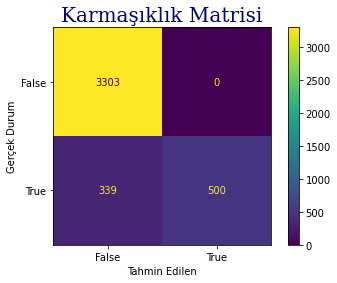

In [39]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
%matplotlib inline

karmasiklikMatrisi = np.array([[TN,FN],[FP,TP]])
kM_gorsel = metrics.ConfusionMatrixDisplay(confusion_matrix = karmasiklikMatrisi, display_labels = [False, True])

kM_gorsel.plot()
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Durum")
plt.title("Karmaşıklık Matrisi", fontdict = {'family':'serif','color':'Darkblue','size':20})

plt.show()

# ***ÇIKARIM:***

**kategoriBulKOMISYONRAPORU** isimli fonksiyonumuz 4142 adet kayıt içinde belge türü tahmini yapmıştır.

- 500 Komisyon Raporu kategorisinde sınıflandırılan belgenin hepsini  Komisyon Raporu kategorisinde sınıflandırabilmiştir.
- 339  Komisyon Raporu kategorisinde sınıflandırılmayan belgeyi de  Komisyon Raporu olarak sınıflandırmıştır.
- 3303  Komisyon Raporu kategorisinde sınıflandırılmayan belgeyi de  Komisyon Raporu kategorisinde sınıflandırmamıştır.
- Kural bazlı yöntemimiz için hesaplamalar aşağıdaki gibi olmuştur.
 - **Doğruluk (Accuracy):** 0.9181554804442298
 - **Keskinlik (Precision):** 0.5959475566150179
 - **Hassasiyet (Sensitivity) / Duyarlılık (Recall):** 1.0
 - **Özgüllük (Specificity):** 0.9069192751235585
 - **F1-Puanı (F1 Score):** 0.7930809889863655